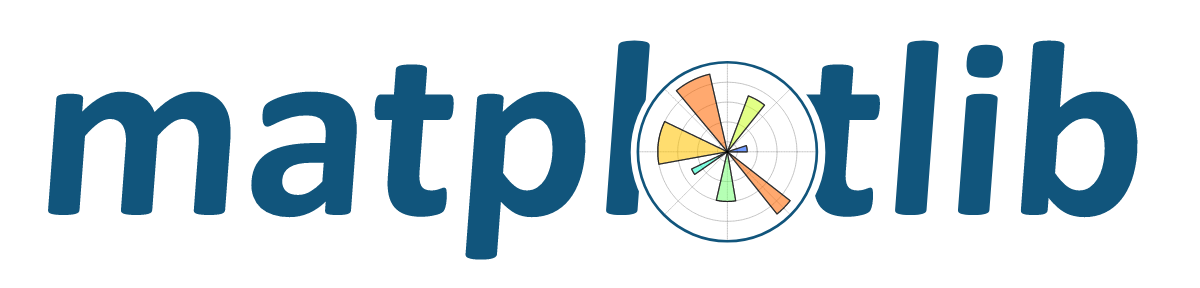

matplotlib es el paquete Python más utilizado en el ámbito de la ciencia de datos para representaciones gráficas

In [1]:
#!pip install matplotlib

La forma más común de importar esta librería es usar el alias plt de la siguiente manera:

In [2]:
import matplotlib.pyplot as plt

### Figura
La [figura](https://matplotlib.org/stable/gallery/showcase/anatomy.html) es el elemento base sobre el que se construyen todos los gráficos en matplotlib. Veamos cómo crearla:

In [3]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [4]:
type(fig)

matplotlib.figure.Figure

Podemos observar que la resolución (por defecto) de la figura es de 640x480 píxeles y que no dispone de ningún eje («0 Axes»). El término «axes» hace referencia a un conjunto de ejes. En español, podemos denominarlo "marco".  

La resolución final de una figura viene determinada por su altura (height) y anchura (width) especificadas en pulgadas que, a su vez, se multiplican por los puntos por pulgada o dpi. Veamos el funcionamiento:

In [5]:
fig.get_figwidth() # pulgadas

6.4

In [6]:
fig.get_figheight() # pulgadas

4.8

In [7]:
fig.get_dpi() # dots per inch (puntos por pulgada)

100.0

In [8]:
fig.get_figwidth() * fig.dpi, fig.get_figheight() * fig.dpi

(640.0, 480.0)

Cuando creamos una figura podemos modificar los parámetros por defecto para obtener la resolución deseada

In [9]:
fig = plt.figure(figsize=(19.2, 10.8), dpi=100)

<Figure size 1920x1080 with 0 Axes>

Si nos interesa que cualquier figura tome unos valores concretos de resolución, podemos modificar los valores por defecto del entorno. Para ello, matplotlib hace uso de un diccionario `plt.rcParams` que contiene los parámetros globales de configuración. Veamos cómo modificarlo:

In [10]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [11]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [12]:
plt.rcParams['figure.figsize'] = (11,5)
plt.rcParams['figure.dpi'] = 100

In [13]:
fig.get_figwidth(), fig.get_figheight(), fig.dpi

(19.2, 10.8, 100)

### Marcos (*axes*)

Para poder empezar a graficar necesitamos tener, al menos, un marco. Utilizaremos el método `add_subplot()` que requiere pasar como parámetros el número de filas, el número de columnas y el marco activo:

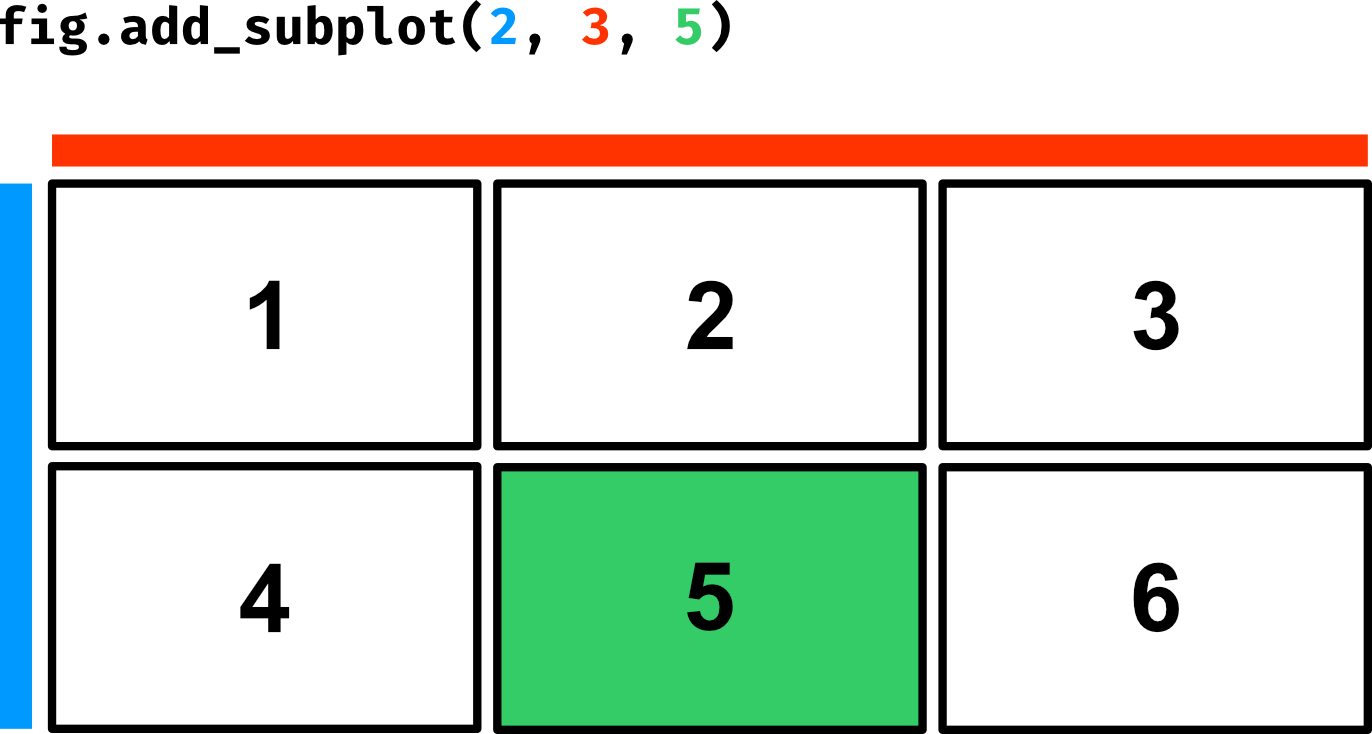

Para comenzar vamos a trabajar únicamente con un marco

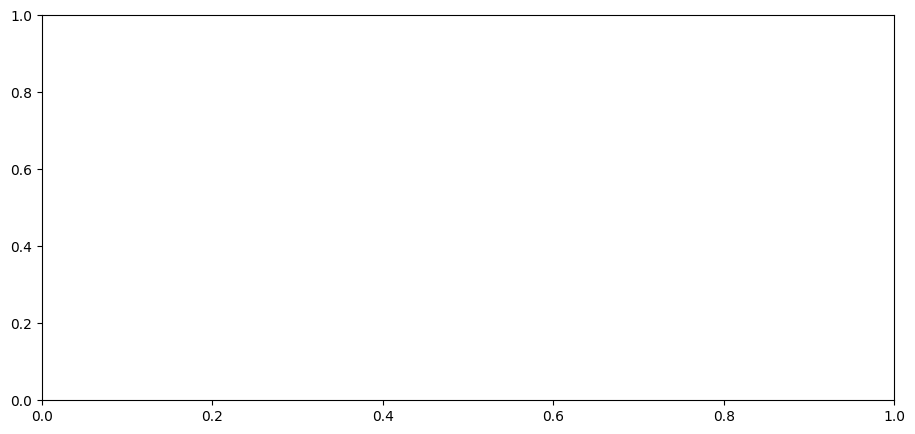

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # equivalente a fig.add_subplot(111)

NOTA: Suele ser habitual encontrar `ax` como nombre de variable del «axes» devuelto por el método `add_subplot()`  
La escala por defecto de cada eje va de 0 a 1 con marcas cada 0.2

Vamos a generar 4 marcos sobre los que fijaremos un título identificativo:

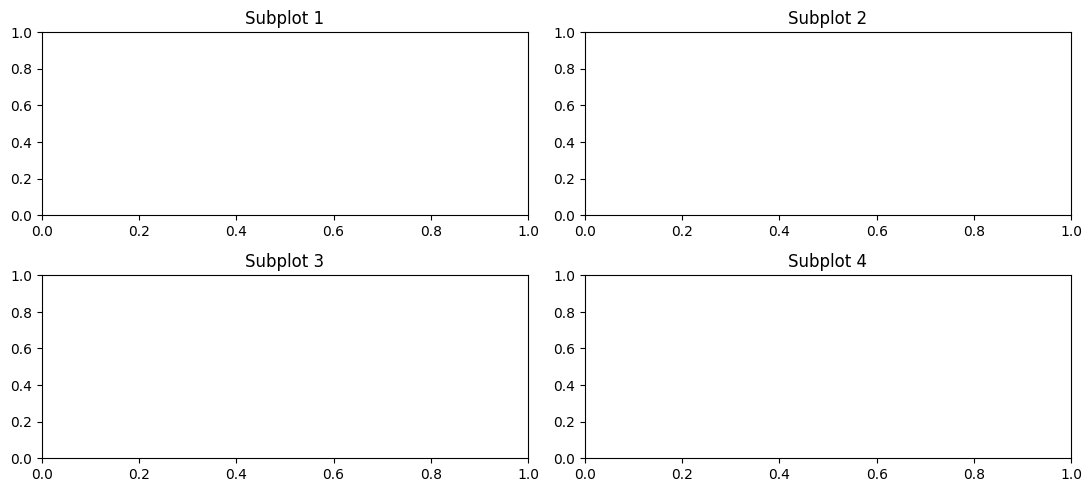

In [15]:
fig = plt.figure()

for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    ax.set_title('Subplot '+str(i))
    
fig.tight_layout(pad=1) # para evitar solapamientos

Matplotlib nos ofrece una forma compacta de crear a la vez tanto la figura como los marcos que necesitemos.

Para ello utilizaremos la función `plt.subplots()` que recibe como parámetros el número de filas y el número de columnas para la disposición de los marcos, y devuelve una tupla con la figura y los marcos.

Se podría ver la función `subplots()` como una combinación de `figure()` + `add_subplot()`

En el siguiente ejemplo creamos una figura con un único marco:

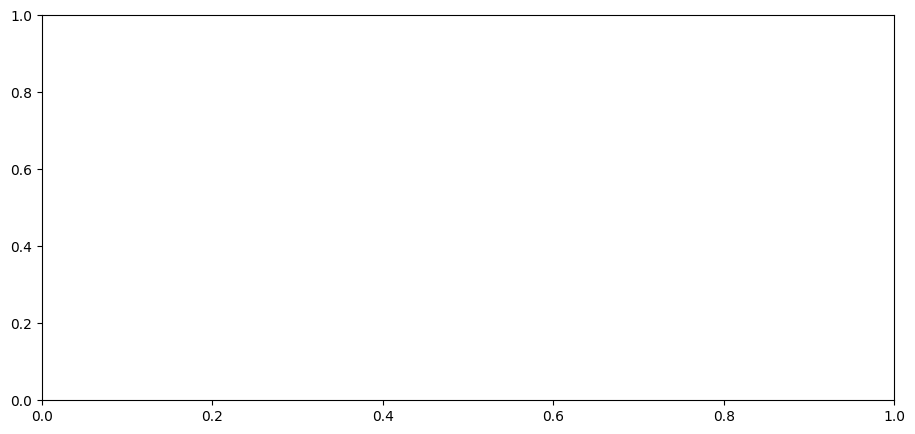

In [16]:
fig, ax = plt.subplots(1,1)

Si invocamos la función `plt.subplots()` sin parámetros, creará por defecto un único marco.

Crea una figura con 6 marcos en disposición de 2 filas por 3 columnas

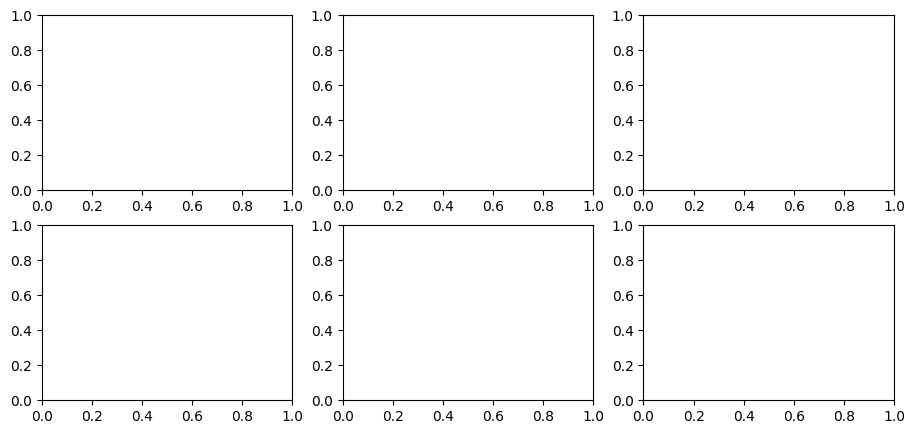

In [17]:
fig, ax = plt.subplots(2,3)

**Etiquetas**  
Dentro de un marco también es posible fijar las etiquetas de los ejes (X e Y)

Text(0, 0.5, 'Etiqueta para el eje Y')

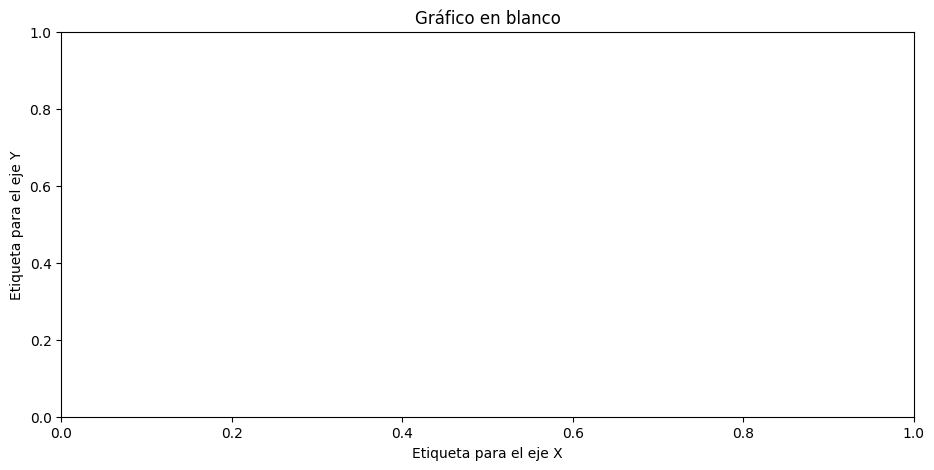

In [18]:
fig, ax = plt.subplots()
ax.set_title('Gráfico en blanco')
ax.set_xlabel('Etiqueta para el eje X')
ax.set_ylabel('Etiqueta para el eje Y')

**Ejes** 

Un marco (2D) está compuesto por dos ejes: eje X e eje Y. Podemos acceder a cada eje mediante sendos atributos


In [19]:
ax.xaxis, ax.yaxis

(<matplotlib.axis.XAxis at 0x2e029c6cf10>,
 <matplotlib.axis.YAxis at 0x2e029c53450>)

**Grid**  

En cada eje podemos activar o desactivar la rejilla, así como indicar su estilo.

En primer lugar vamos a activar la rejilla en ambos ejes:

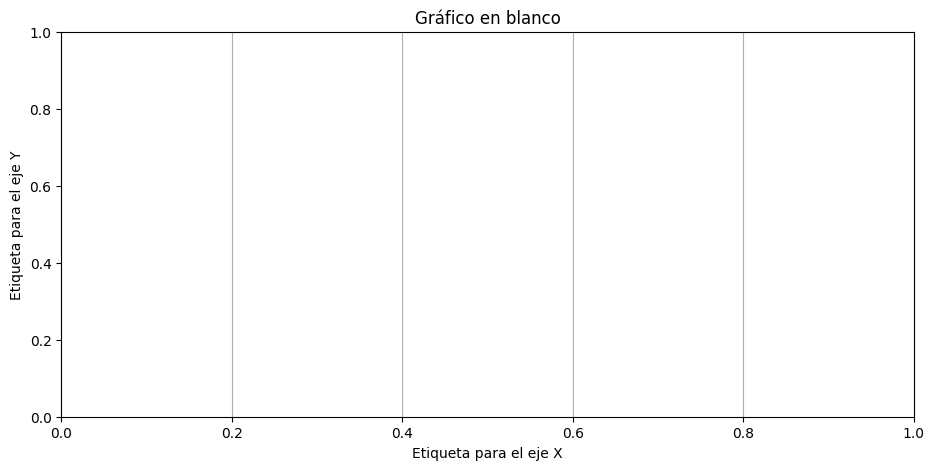

In [20]:
ax.xaxis.grid(True)
fig

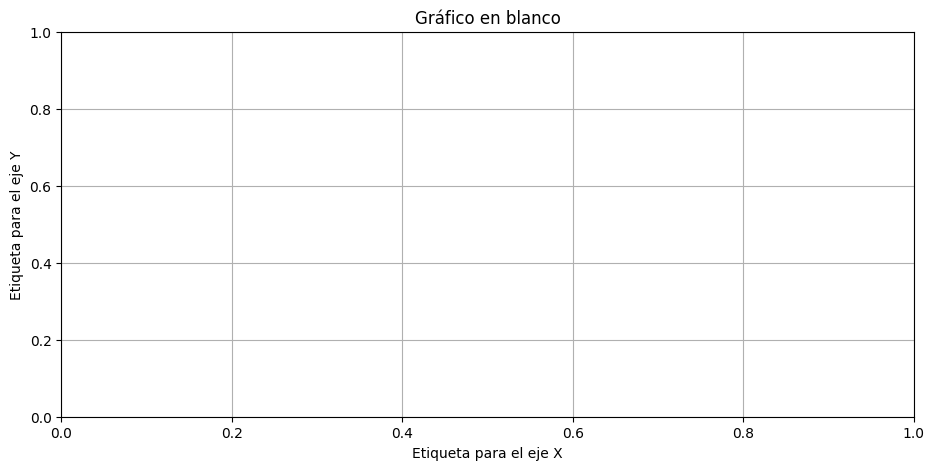

In [21]:
ax.yaxis.grid(True)
fig

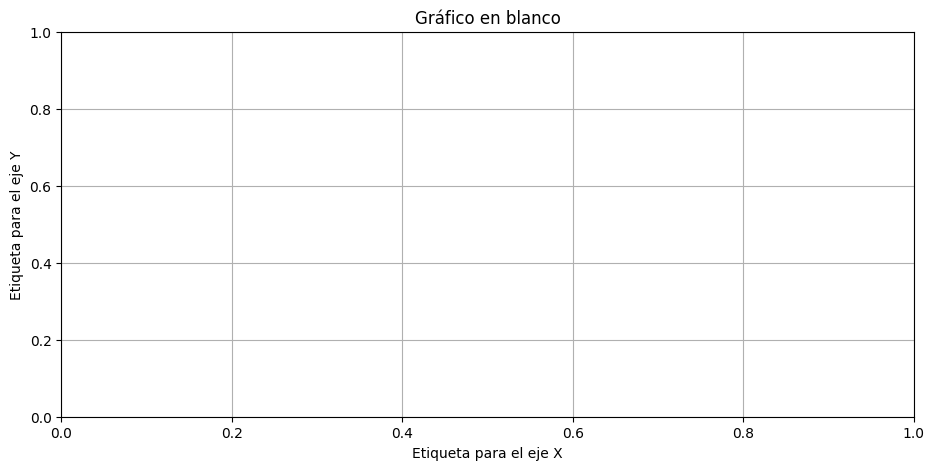

In [22]:
# Equivalente
ax.grid(True)
fig

Supongamos ahora que queremos personalizar la rejilla con estilos diferentes en cada eje:

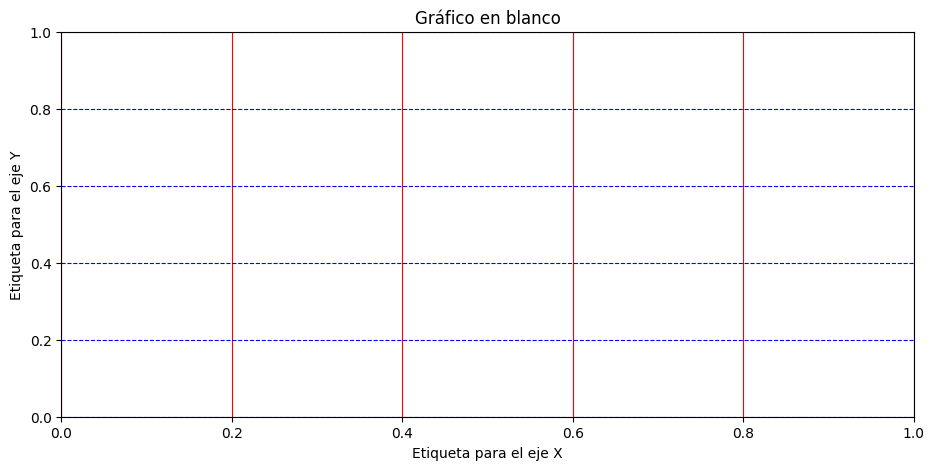

In [23]:
ax.xaxis.grid(color='r', linestyle='-')
ax.yaxis.grid(color='b', linestyle='--')
fig

[Parámetros disponibles para creación del grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)    

[Listado de nombres de colores en matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html)  

[Estilos de línea en matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

**Marcas**  

Por defecto, los ejes del marco tienen unas marcas equiespaciadas que constituyen las marcas mayores. Igualmente existen unas marcas menores que, a priori, no están activadas.

Ambos elementos son susceptibles de modificarse. Veamos un ejemplo en el que establecemos las marcas menores con distinto espaciado en cada eje y además le damos un estilo diferente a cada rejilla:

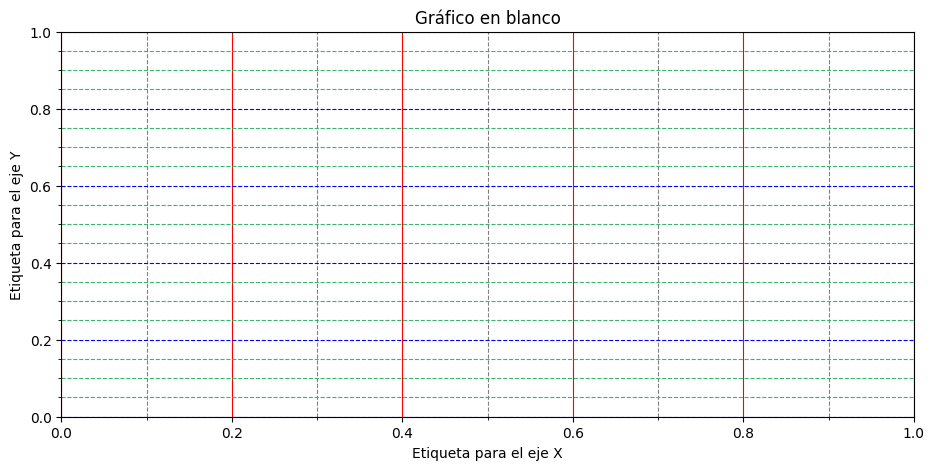

In [24]:
from matplotlib.ticker import MultipleLocator

ax.xaxis.set_minor_locator(MultipleLocator(0.1)) # X: separación de 0.1 unidades
ax.yaxis.set_minor_locator(MultipleLocator(0.05)) # Y: separación cada 0.05

ax.xaxis.grid(which='minor', linestyle='dashed', color='gray')
ax.yaxis.grid(which='minor', linestyle='dashed', color='mediumseagreen')

fig

También es posible asignar etiquetas a las marcas menores. En ese sentido, veremos un ejemplo en el que incorporamos los valores a los ejes con estilos propios:

Marcas menores en el eje X: precisión de 1 decimal, tamaño de letra 8 y color gris.

Marcas menores en el eje Y: precisión de 2 decimales, tamaño de letra 8 y color azul.

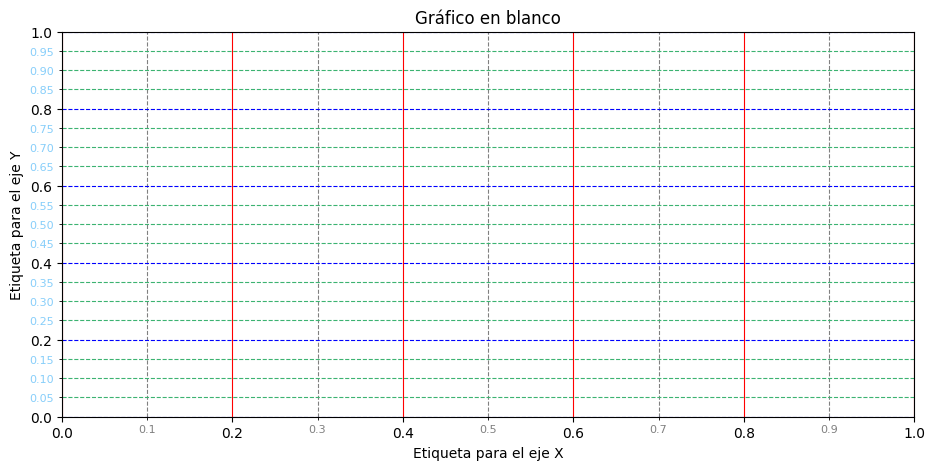

In [25]:
# Eje X
ax.xaxis.set_minor_formatter('{x:.1f}')
ax.tick_params(axis='x', which='minor', labelsize=8, labelcolor='gray')

# Eje Y
ax.yaxis.set_minor_formatter('{x:.2f}')
ax.tick_params(axis='y', which='minor', labelsize=8, labelcolor='lightskyblue')

fig

### Primeros pasos

Vamos a empezar por representar la función $f(x)=\sin(x)$. Para ello crearemos una variable x con valores flotantes equidistantes y una variable y aplicando la función seno.  A continuación usaremos el método `plot()` del marco para representar la función creada:

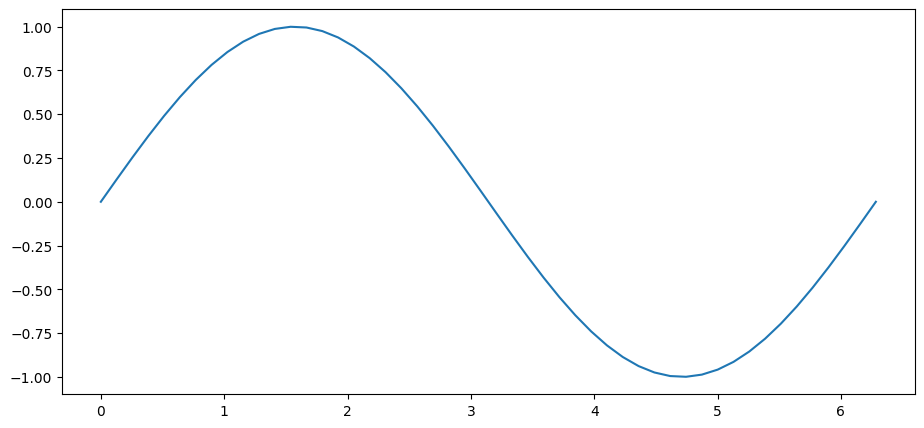

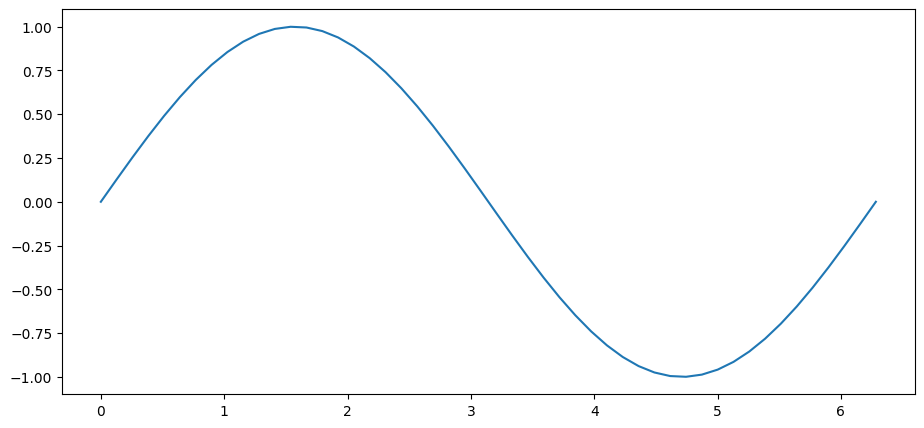

In [26]:
import numpy as np
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y);
fig

Partiendo de un mismo marco, es posible graficar todas las funciones que necesitemos. A continuación crearemos un marco con las funciones seno y coseno:

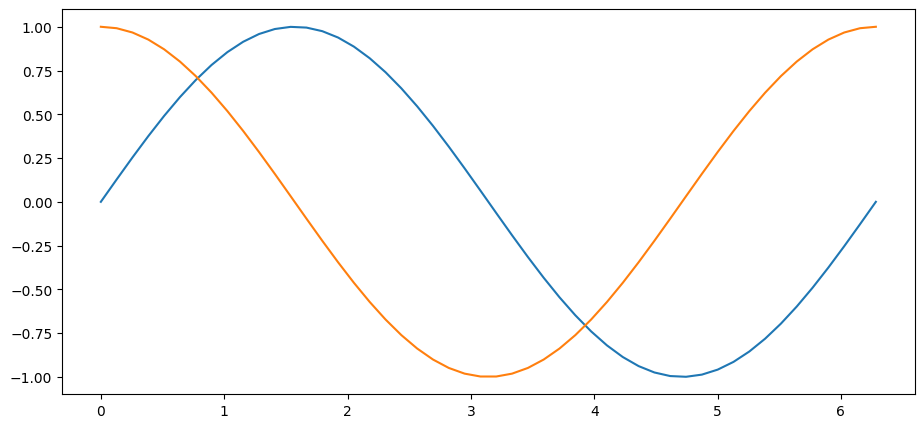

In [27]:
cos = np.cos(x)
ax.plot(x,cos);
fig

NOTA: Los colores «auto» asignados a las funciones siguen un [estilo establecido por matplotlib](https://matplotlib.org/stable/users/dflt_style_changes.html#colors-in-default-property-cycle) que es igualmente personalizable.



**Leyenda**  

En el caso de que tengamos múltiples gráficos en el mismo marco puede ser deseable mostrar una leyenda identificativa. Para usarla necesitamos asignar etiquetas a cada función. Veamos a continuación cómo incorporar una leyenda:

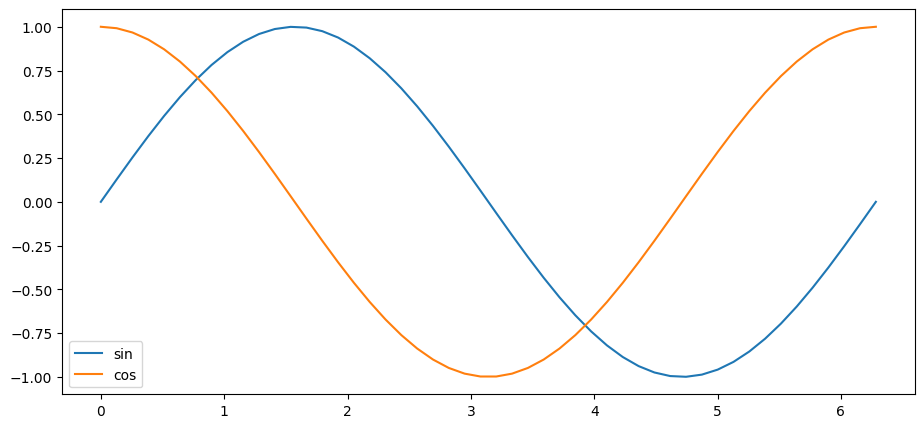

In [28]:
fig, ax = plt.subplots()
sin = np.sin(x)
cos = np.cos(x)
ax.plot(x, sin, label='sin')
ax.plot(x, cos, label='cos')

ax.legend();

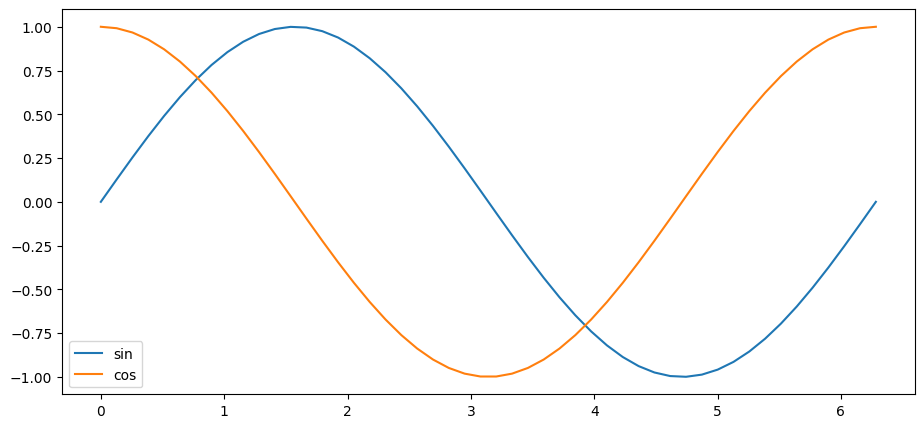

In [29]:
fig

Es posible incorporar sintaxis Latex en los distintos elementos textuales de matplotlib. En el siguiente ejemplo usaremos esta notación en las etiquetas de las funciones utilizando el símbolo $ ... $ para ello:

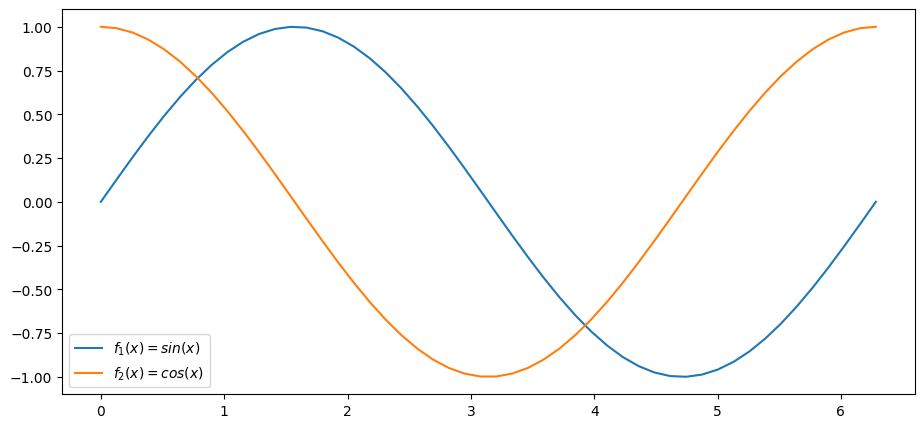

In [30]:
fig, ax = plt.subplots()
ax.plot(x, sin, label='$f_1(x) = sin(x)$')
ax.plot(x, cos, label='$f_2(x) = cos(x)$')
ax.legend();

Matplotlib intenta encontrar la mejor ubicación para la leyenda en el marco. Sin embargo, también es posible personalizar el lugar en el que queremos colocarla.

Si nos interesa situar la leyenda en la parte superior central del marco haríamos lo siguiente:

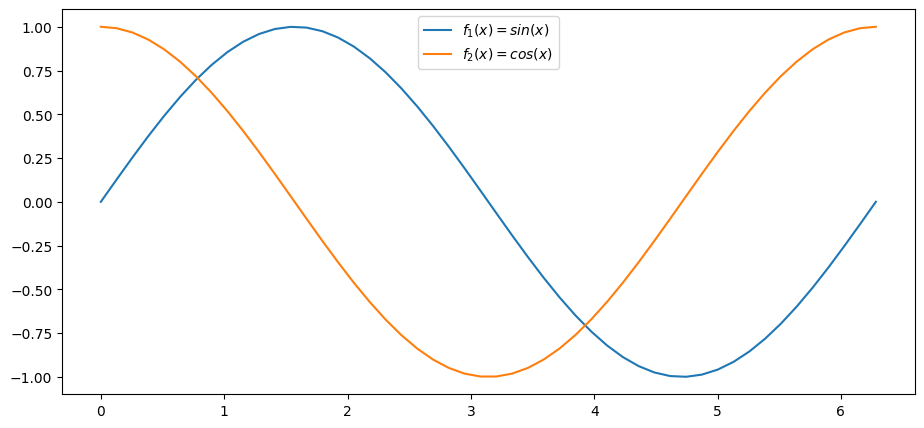

In [31]:
ax.legend(loc='upper center');
fig

Si queremos usar subplots:

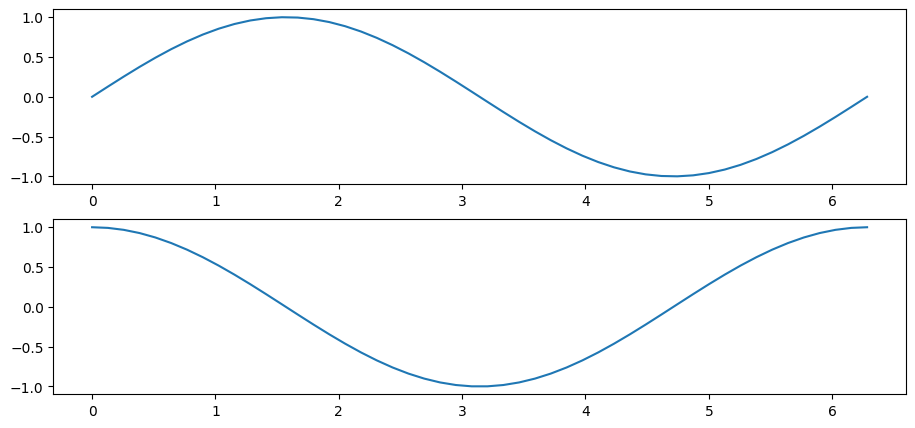

In [32]:
plt.figure()
plt.subplot(2,1,1) # filas, columnas, marco
plt.plot(x,sin);

plt.subplot(2,1,2)
plt.plot(x,cos);

**Aplicando estilos**

Para cada función que incluimos en el marco es posible establecer un estilo personalizado con multitud de parámetros. Veamos la aplicación de algunos de estos parámetros a las funciones seno y coseno con las que hemos estado trabajando:

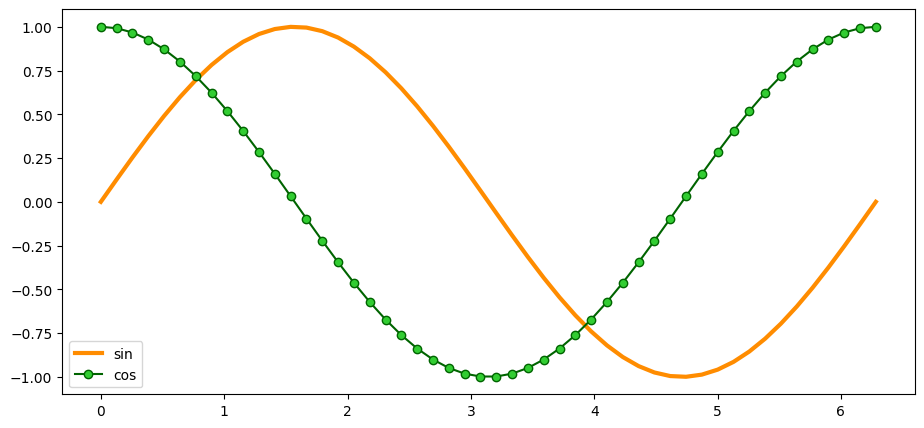

In [33]:
fig, ax = plt.subplots();

sin_style = {'linewidth':3, 'color':'darkorange'}
cos_style = {'marker':'o', 'markerfacecolor':'limegreen', 'color':'darkgreen'}

ax.plot(x, sin, label='sin', **sin_style)
ax.plot(x, cos, label='cos', **cos_style)

ax.legend();

```Python
def foo(**kwargs):
    ...

# call using normal keys:
foo(a=1, b=2, c=3)
# call using an unpacked dictionary:
foo(**{"a": 1, "b":2, "c":3})
```

**Acotando ejes**

Hay veces que nos interesa definir los límites de los ejes. En ese caso, podemos hacerlo de una manera muy sencilla:

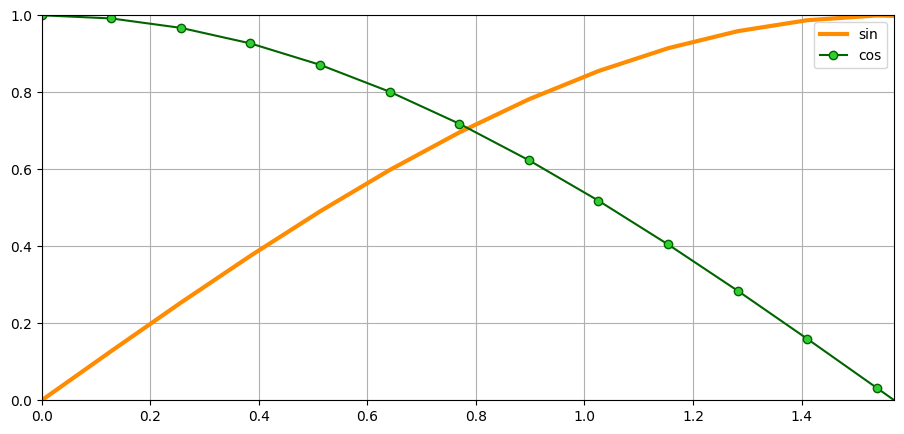

In [34]:
ax.set_xlim(0, np.pi/2)
ax.set_ylim(0,1)
ax.grid(True)
fig

También es posible especificar únicamente límite inferior o superior en ambos `set_xlim()` y `set_ylim()`. En ese caso, el otro valor sería ajustado automáticamente por matplotlib.

**Anotaciones**

En ocasiones necesitamos añadir ciertas anotaciones al gráfico que estamos diseñando. Esto permite destacar áreas o detalles que pueden ser relevantes.

Partiendo de las funciones seno y coseno con las que hemos estado trabajando, vamos a suponer que queremos obtener sus puntos de corte, es decir, resolver la [siguiente ecuación](https://www.mathway.com/popular-problems/Precalculus/435071):

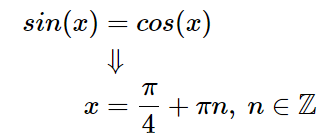

Para el caso que nos ocupa haríamos $n=0$ con lo que obtendríamos la siguiente solución:

In [35]:
xsol = np.pi/4
ysol = np.sin(xsol)
(xsol, ysol)

(0.7853981633974483, 0.7071067811865476)

Vamos a insertar una serie de anotaciones en el gráfico:

- Flecha en el punto de corte con etiqueta de ecuación.

- Coordenadas de solución en el punto de corte.

- Proyección del punto de corte hacia ambos ejes.

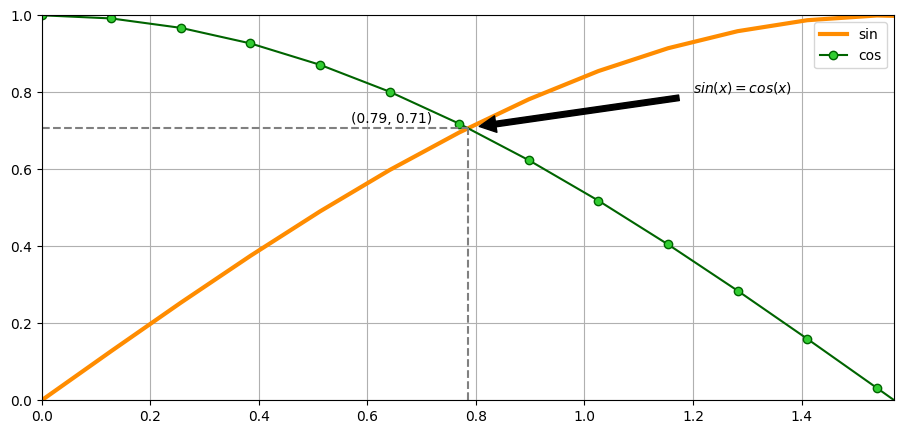

In [36]:
ax.annotate('$sin(x)=cos(x)$',
           xy=(xsol,ysol), 
           xytext = (1.2, 0.8),
           arrowprops={'facecolor':'black', 'shrink':0.05})

ax.text(0.57, 0.72,(round(xsol,2),round(ysol,2)))

ax.plot([xsol, xsol], [0,ysol], color='gray',linestyle='--')
ax.plot([0, xsol], [ysol, ysol], color='gray',linestyle='--')

fig

<h2 style="color: red;">Do it yourself</h2>

Crea el siguiente gráfico
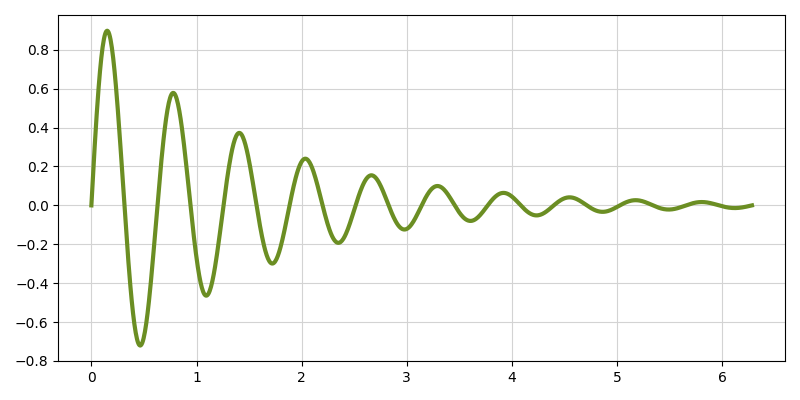

$x∈[0,2\pi]$ (1000 puntos)

$y=e^{−\alpha x}\sin(\beta x)$, donde α=0.7 y β=10.

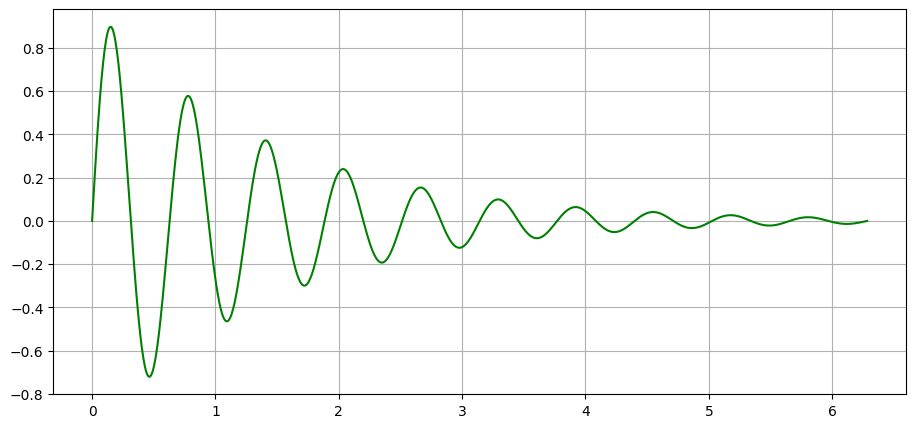

In [37]:
import numpy as np
x = np.linspace(0, 2*np.pi,1000)
alpha = 0.7
beta = 10

y = np.exp(-alpha*x)*np.sin(beta*x)

fig, ax = plt.subplots()

ax.plot(x,y, color= 'green')
ax.grid(True)

### Tipos de gráficos
Mediante matplotlib podemos hacer prácticamente cualquier tipo de gráfico. En esta sección haremos un repaso por algunos de ellos.

**Gráficos de barras**  

Vamos a partir de un dataset que contiene los resultados de los [Juegos Olímpicos de Tokio 2020](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/version/7?select=Medals.xlsx)   
En primer lugar cargaremos este fichero en un DataFrame y haremos una pequeña limpieza:

In [38]:
import pandas as pd

df = pd.read_excel('data/medals.xlsx')
df.head()

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [39]:
df.rename(columns={'Team/NOC':'Country'}, inplace=True)
df.set_index('Country', inplace=True)
df.head(10)

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Country,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
Japan,3,27,14,17,58,5
Great Britain,4,22,21,22,65,4
ROC,5,20,28,23,71,3
Australia,6,17,7,22,46,6
Netherlands,7,10,12,14,36,9
France,8,10,12,11,33,10
Germany,9,10,11,16,37,8


A continuación crearemos un gráfico de barras con las medallas de oro, plata y bronce de los 10 primeros países ordenados por su ranking. Lo primero será crear el subconjunto de datos sobre el que vamos a trabajar. Hay muchas maneras de hacerlo. Una de ellas:

In [40]:
df_best = df.nsmallest(10,'Rank')
df_best

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Country,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
Japan,3,27,14,17,58,5
Great Britain,4,22,21,22,65,4
ROC,5,20,28,23,71,3
Australia,6,17,7,22,46,6
Netherlands,7,10,12,14,36,9
France,8,10,12,11,33,10
Germany,9,10,11,16,37,8


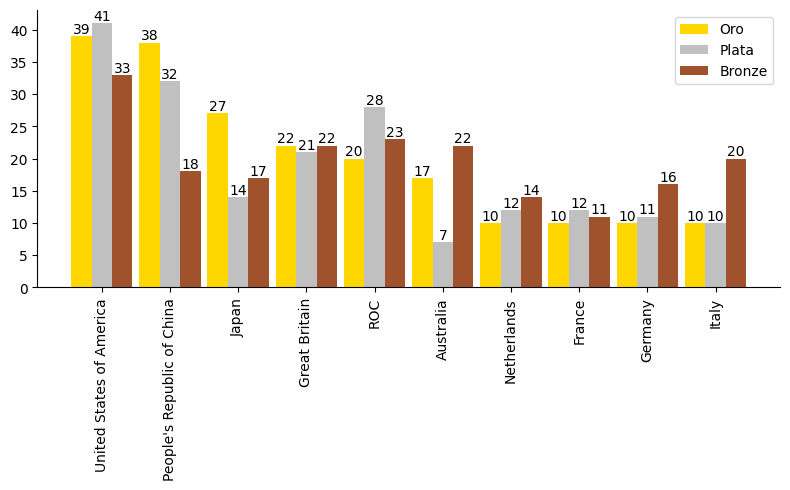

In [41]:
fig, ax = plt.subplots(figsize=(8,5))

bar_width = 0.30
x = np.arange(df_best.index.size)

golden = ax.bar(x-bar_width, df_best['Gold'], bar_width, label='Oro', color='gold')
silver = ax.bar(x, df_best['Silver'], bar_width, label='Plata', color='silver')
bronze = ax.bar(x+bar_width, df_best['Bronze'], bar_width, label='Bronze', color='sienna')

ax.set_xticks(x);
ax.set_xticklabels(df_best.index, rotation=90);
ax.legend();

# Etiquetas en las barras
ax.bar_label(golden);
ax.bar_label(silver);
ax.bar_label(bronze);

ax.spines['right'].set_visible(False) # oculta el borde derecho
ax.spines['top'].set_visible(False) # oculta el borde superior

fig.tight_layout()

<h2 style="color: red;">Do it yourself</h2>

Partiendo del fichero [tiobe-2020-clean.csv](https://aprendepython.es/_downloads/8778a635310cc21609208af23ea3211b/tiobe-2020-clean.csv) que contiene las valoraciones de los lenguajes de programación más usados durante el año 2020, crea el siguiente gráfico de barras:

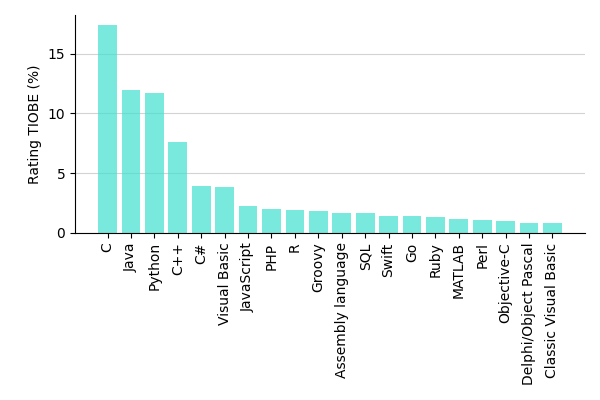

C:\Users\ortiz\AppData\Local\Temp\ipykernel_9548\2738745068.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Language'], rotation=90);


Text(0, 0.5, 'Rating TIOBE (%)')

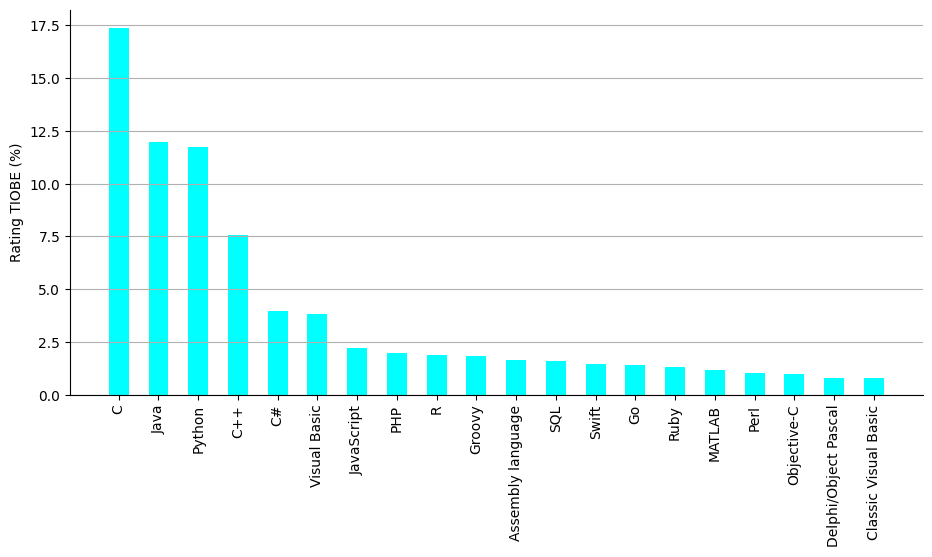

In [42]:
df = pd.read_csv(r'C:\Users\ortiz\OneDrive\Documents\GitHub\DS_PT_09_2023\Data_Analysis\5-Visualización\Teoria\data\tiobe-2020-clean.csv')

bar_width = 0.5

fig, ax = plt.subplots()
ax.yaxis.grid(True)
ax.bar(df['Language'], df['Ratings'], bar_width, color='cyan')
# ax.bar_label(leng)
ax.set_xticklabels(df['Language'], rotation=90);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('Rating TIOBE (%)')

**Gráficos de dispersión (*Scatter plot*)**

Para este gráfico vamos a usar un dataset de jugadores de la NBA  extraído desde esta [página de Kaggle](https://www.kaggle.com/justinas/nba-players-data). El fichero nba-data.csv contiene información desde 1996 hasta 2019.

En primer lugar cargamos los datos y nos quedamos con un subconjunto de las columnas:

In [43]:
df = pd.read_csv('data/all_seasons.csv',usecols=['pts','reb','ast'])
df.head()

,pts,reb,ast
0,3.9,1.5,2.4
1,3.8,1.3,0.3
2,8.3,6.4,1.9
3,10.2,2.8,1.7
4,2.8,1.7,0.3


El objetivo es crear un gráfico de dispersión en el relacionaremos los puntos anotados con los rebotes capturados, así como las asistencias dadas:

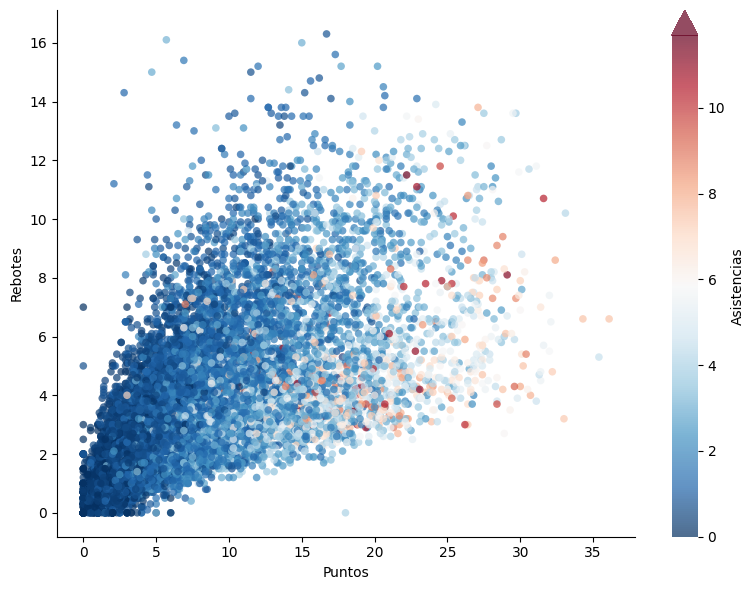

In [44]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  # 800x600 px

# Crear variables auxiliares
x = df['pts']
y = df['reb']
colors = df['ast']

p = ax.scatter(x, y,
               s=30,  # tamaño de los puntos
               c=colors, cmap='RdBu_r',  # colores
               vmin=colors.min(), vmax=colors.max(),  # normalización de colores
               alpha=0.7,
               edgecolors='none')

# Barra de colores
cb = fig.colorbar(p, ax=ax, label='Asistencias', extend='max')
cb.outline.set_visible(False)

ax.set_xlabel('Puntos')
ax.set_ylabel('Rebotes')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

Del gráfico anterior cabe destacar varios aspectos:

- **Normalización**: Cuando aplicamos una estética de color al gráfico basada en los datos de una variable, debemos normalizar dicha variable en el mapa de color («colormap») que elijamos. Para ello, matplotlib nos ofrece la normalización de mapas de color. En el caso concreto de scatter() pasaríamos esta normalización mediante el parámetro norm pero también podemos usar los parámetros vmin y vmax.

- **Barra de color**: Se trata de una leyenda particular en la que mostramos el gradiente de color vinculado a una determinada estética/variable del gráfico. Matplotlib también nos permite personalizar estas [barras de color](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

<h2 style="color: red;">Do it yourself</h2>

Partiendo del fichero [bmw-clean.csv](https://aprendepython.es/_downloads/9be7b341c4a9dc02dfab0e9f6752f148/bmw-clean.csv) que contiene información sobre vehículos de la marca BMW, cree el siguiente gráfico de dispersión:

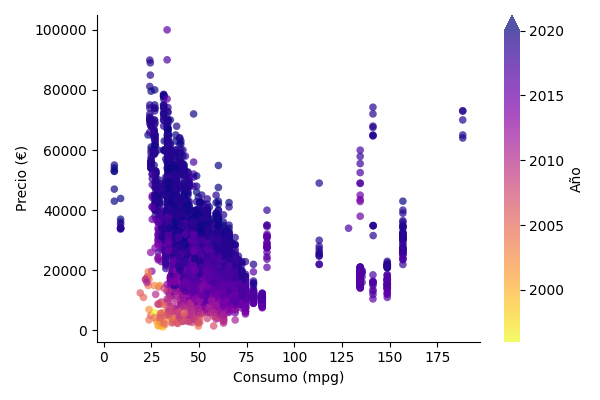

El mapa de color que se ha usado es `plasma_r`



In [45]:
df = pd.read_csv(r'C:\Users\ortiz\OneDrive\Documents\GitHub\DS_PT_09_2023\Data_Analysis\5-Visualización\Teoria\data\bmw-clean.csv', index_col='Unnamed: 0')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


**Histogramas**  

En esta ocasión vamos a trabajar con un dataset de «Avengers» 6 extraído desde [Kaggle](https://www.kaggle.com/mysarahmadbhat/avengers-marvel). Hemos descargado el fichero avengers.csv.

Como punto de partida vamos a cargar la información y a quedarnos únicamente con la columna que hace referencia al año en el que se crearon los personajes:

In [46]:
import pandas as pd
df = pd.read_csv('data/avengers.csv', encoding='latin-1',usecols=['Year'])
df = df.loc[df.Year>=1960]
df.head()

,Year
0,1963
1,1963
2,1963
3,1963
4,1963


In [47]:
df.describe()

,Year
count,159.000000
mean,1996.232704
std,15.817870
min,1963.000000
25%,1986.500000
50%,2003.000000
75%,2010.000000
max,2015.000000


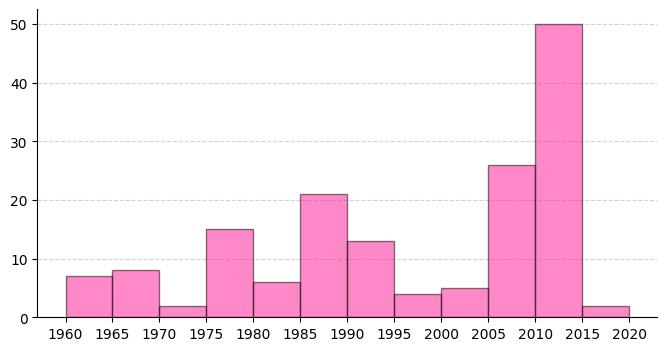

In [48]:
fig, ax = plt.subplots(figsize=(8,4))

ax.hist(df, 
        bins=range(1960,2021,5), # intervalos de agrupación
        rwidth=1, # ancho de cada barra
        zorder=2, # barras por encima del grid
        color='deeppink',
        edgecolor='black',
        alpha=0.5
       );

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(range(1960,2021,5)) # etiquetas de intervalos en el eje x
ax.yaxis.grid(color='lightgray',linestyle='--') # grid en el eje y

Técnicamente este gráfico no es un histograma ya que los años (fechas en general) no representan categorías válidas, pero sirve a efectos demostrativos de cómo se construyen este tipo de diagramas.

Muchas veces nos interesa pintar varios histogramas en el mismo gráfico

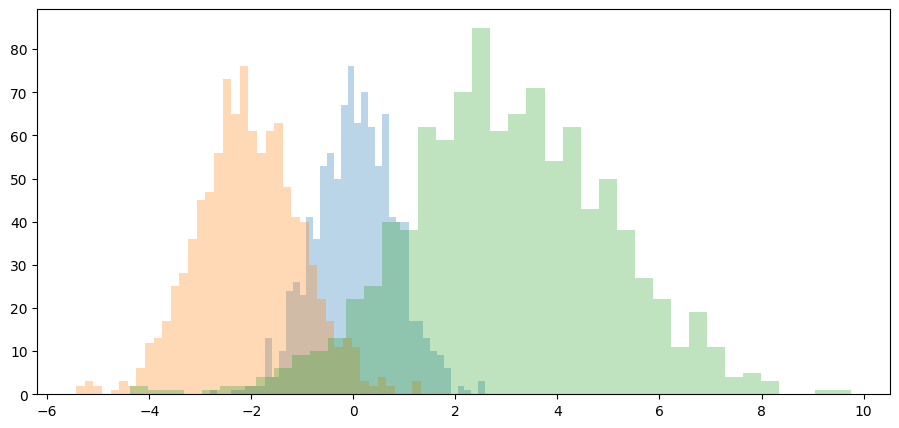

In [49]:
import numpy as np
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='bar', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

<h2 style="color: red;">Do it yourself</h2>

Partiendo del fichero [pokemon.csv](https://aprendepython.es/_downloads/48066928832fcc857fbf9724e3dda522/pokemon.csv) que contiene información sobre Pokemon 10, cree el siguiente histograma en el que se analiza el número de personajes «pokemons» en función de su velocidad (columna Speed):

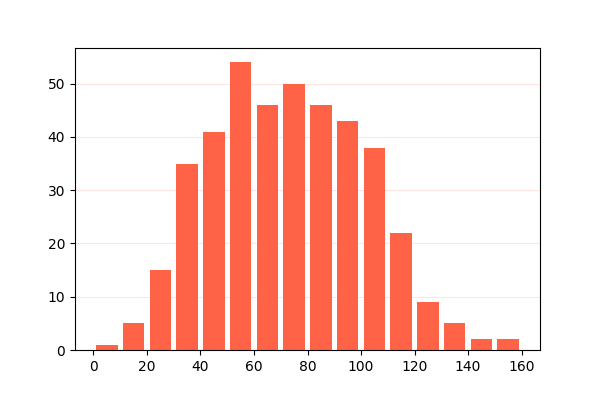

**Series temporales**



In [50]:
df = pd.read_csv('https://aprendepython.es/_downloads/53b8a6a999bd01a5fb23c69b2fd3675a/global-temperatures.csv',
                 parse_dates=['dt'],  # conversión a tipo datetime
                 usecols=['dt', 'LandAverageTemperature'])

df.rename(columns={'dt': 'when', 'LandAverageTemperature': 'temp'}, inplace=True)
df.dropna(inplace=True)
df.head()

,when,temp
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [51]:
df.shape

(3180, 2)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\ortiz\AppData\Local\Temp\ipykernel_9548\813344418.py:13: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(x, y, 50)  # ajuste polinómico de grado 2


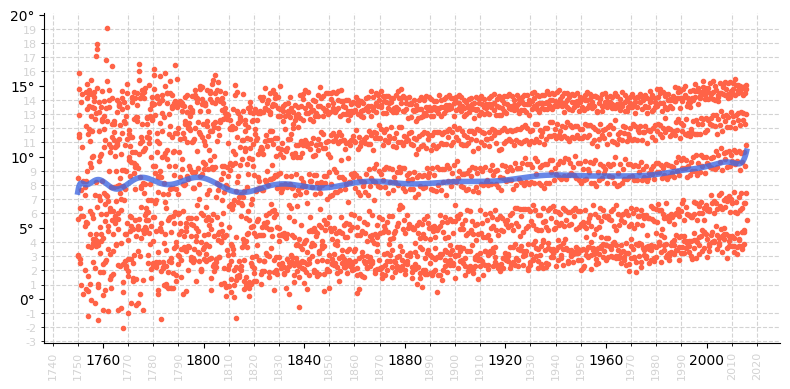

In [52]:
# Necesitamos algunas utilidades de gestión de fechas
from matplotlib.dates import YearLocator, DateFormatter, date2num
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(8,4))
x = df.when
y = df.temp

ax.plot(x,y,marker='.',color='tomato',linestyle='None')

# Construcción de la línea de tendencia
x = date2num(x)
z = np.polyfit(x, y, 50)  # ajuste polinómico de grado 2
p = np.poly1d(z)
plt.plot(x, p(x), linewidth=4, alpha=0.8, color='royalblue')

# Formateo de los ejes
ax.xaxis.set_minor_locator(YearLocator(10))
ax.xaxis.set_minor_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', which='minor',
               labelsize=8, labelcolor='lightgray', rotation=90)
ax.xaxis.grid(which='minor', color='lightgray', linestyle='dashed')
ax.yaxis.set_major_formatter('{x:.0f}°')
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='y', which='minor',
               labelsize=8, labelcolor='lightgray')
ax.yaxis.grid(which='minor', linestyle='dashed', color='lightgray')
ax.yaxis.set_minor_formatter('{x:.0f}')
ax.tick_params(axis='y', which='minor', labelsize=8, labelcolor='lightgray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

**Mapas de calor**  
Para este tipo de gráfico vamos a utilizar un [dataset](https://aprendepython.es/_downloads/1cb0f935f4c1fc1f1b283e6be0f6fbdd/imdb-top-1000.csv) que recoge las 1000 películas más valoradas en IMDB 7. 

En primer lugar vamos a cargar los datos quedándonos con las columnas Certificate (clasificación de la película según edades), Genre (géneros de la película) e IMDB_Rating (valoración de la película en IMDB):

In [53]:
df = pd.read_csv('https://aprendepython.es/_downloads/1cb0f935f4c1fc1f1b283e6be0f6fbdd/imdb-top-1000.csv',
                 usecols=['Certificate', 'Genre', 'IMDB_Rating'])

df.head()

,Certificate,Genre,IMDB_Rating
0,A,Drama,9.3
1,A,"Crime, Drama",9.2
2,UA,"Action, Crime, Drama",9.0
3,A,"Crime, Drama",9.0
4,U,"Crime, Drama",9.0


Ahora creamos una nueva columna en el DataFrame donde guardaremos únicamente el género principal de cada película:

In [54]:
df['Main_Genre'] = df['Genre'].str.split(',',expand=True)[0]
df.head()

,Certificate,Genre,IMDB_Rating,Main_Genre
0,A,Drama,9.3,Drama
1,A,"Crime, Drama",9.2,Crime
2,UA,"Action, Crime, Drama",9.0,Action
3,A,"Crime, Drama",9.0,Crime
4,U,"Crime, Drama",9.0,Crime


A continuación agrupamos y obtenemos los valores medios de las valoraciones:



In [55]:
ratings = df.groupby(['Certificate','Main_Genre'])['IMDB_Rating'].mean().unstack()

# Nos quedamos con un subconjunto de certificados y géneros
review_certificates = ['U', 'UA', 'PG-13', 'R', 'A']
review_genres = ['Animation','Action','Adventure','Biography','Comedy',
                'Crime','Drama']
ratings = ratings.loc[review_certificates,review_genres]

certs = {'U':'ALL', 'UA':'>12', 'PG-13':'>13', 'R':'>17','A':'>18'}
ratings.index = ratings.reset_index()['Certificate'].replace(certs)
ratings

Main_Genre,Animation,Action,Adventure,Biography,Comedy,Crime,Drama
Certificate,,,,,,,
ALL,7.947368,8.165000,7.953571,7.862500,7.940541,8.200000,7.976364
>12,7.883333,7.992424,7.958333,7.971429,7.885714,7.900000,7.953659
>13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000
>17,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094
>18,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364


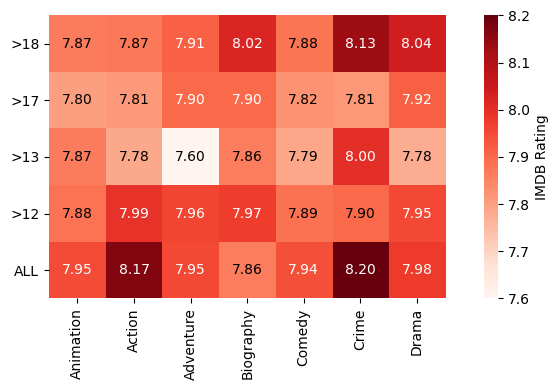

In [56]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

text_colors = ('black', 'white')
im = ax.imshow(ratings, cmap='Reds')  # mapa de calor
cbar = fig.colorbar(im, ax=ax, label='IMDB Rating')  # leyenda
cbar.outline.set_visible(False)

x = ratings.columns
y = ratings.index

# Mostrar las etiquetas. El color del texto cambia en función de su normalización
for i in range(len(y)):
    for j in range(len(x)):
        value = ratings.iloc[i, j]
        text_color = text_colors[int(im.norm(value) > 0.5)]  # color etiqueta
        ax.text(j, i, f'{value:.2f}', color=text_color, va='center', ha='center')

# Formateo de los ejes
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()

ax.spines[:].set_visible(False)

fig.tight_layout()

<h2 style="color: red;">Do it yourself</h2>

Partiendo del fichero [euro-dollar-clean.csv](https://aprendepython.es/_downloads/f82fdb559d891eb1abae82a7c66627ce/euro-dollar-clean.csv) que contiene información sobre el cambio euro-dollar durante los últimos 12 años 11, cree el siguiente mapa de calor en el que se analiza la evolución del cambio enfrentando meses y años:

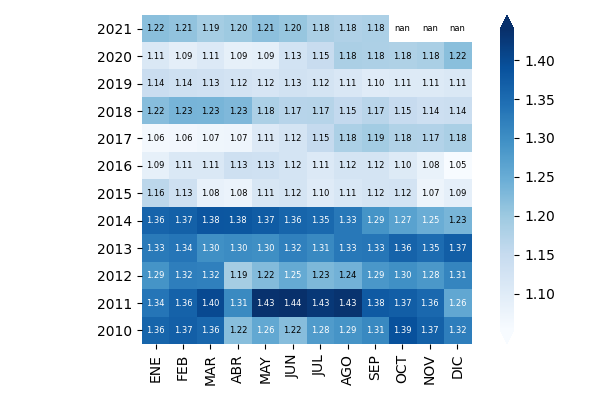

**Diagramas de caja**  

Un diagrama de caja permite visualizar la distribución de los valores de manera rápida y muy visual:

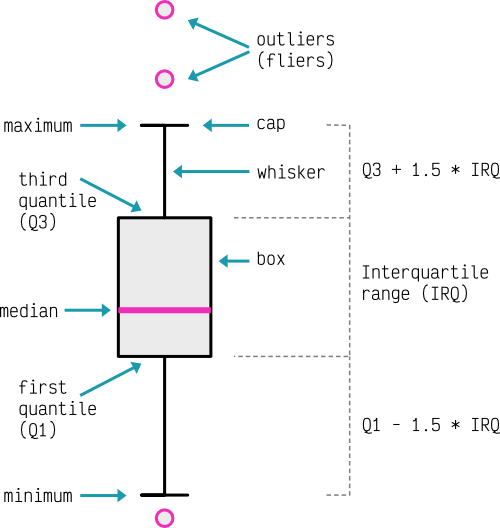

In [57]:
DIST_SIZE = 100  # tamaño de la muestra

boxplots = []

boxplots.append(dict(
    dist=np.random.normal(0, 1, size=DIST_SIZE),
    label='Normal\n$\mu=0, \sigma=1$',
    fill_color='pink',
    brush_color='deeppink'))

boxplots.append(dict(
    dist=np.random.geometric(0.4, size=DIST_SIZE),
    label='Geometric\n$p=0.4$',
    fill_color='lightblue',
    brush_color='navy'))

boxplots.append(dict(
    dist=np.random.chisquare(2, size=DIST_SIZE),
    label='Chi-squared\n$df=2$',
    fill_color='lightgreen',
    brush_color='darkgreen'))

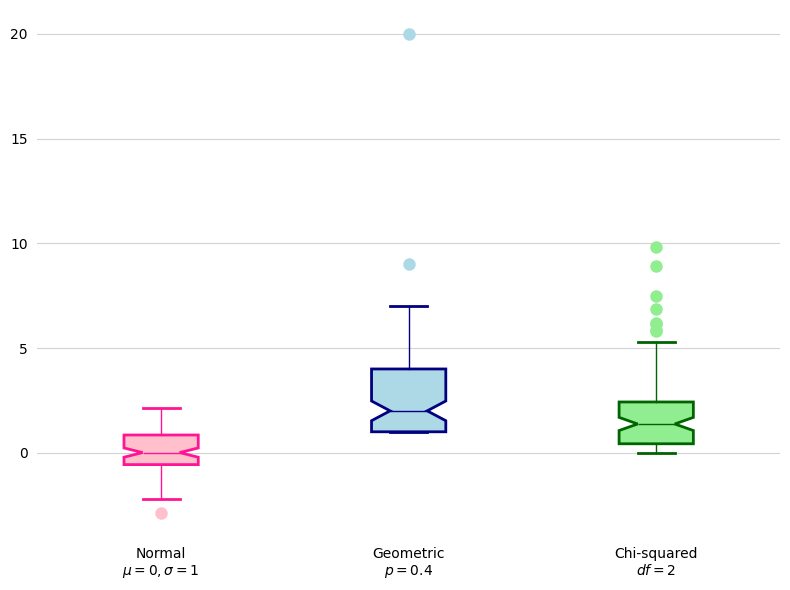

In [58]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  # 800x600 px

for i, boxplot in enumerate(boxplots):
    fcolor, bcolor = boxplot['fill_color'], boxplot['brush_color']
    ax.boxplot(boxplot['dist'],
               labels=[boxplot['label']],
               positions=[i],
               widths=[.3],
               notch=True,
               patch_artist=True,
               boxprops=dict(edgecolor=bcolor,
                             facecolor=fcolor,
                             linewidth=2),
               capprops=dict(color=bcolor, linewidth=2),
               flierprops=dict(color=bcolor,
                               markerfacecolor=fcolor,
                               linestyle='none',
                               markeredgecolor='none',
                               markersize=9),
               medianprops=dict(color=bcolor),
               whiskerprops=dict(color=bcolor,
                                 linewidth=1))

ax.yaxis.grid(color='lightgray')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.spines[:].set_visible(False)

fig.tight_layout()

**Gráficos de evolución**

Partiendo de un conjunto de datos temporales, vamos a aprovechar para elaborar un gráfico de evolución del precio de criptomonedas. En esta ocasión hemos utilizado el dataset [eth-usd.csv](https://aprendepython.es/_downloads/17a61e8ae98c82aca6b6fe4724c3b650/eth-usd.csv), que contiene la valoración de la criptomoneda Ethereum en función de una marca temporal, así como el volumen de moneda existente en cada momento.

El objetivo será crear un gráfico que represente el valor de la criptomoneda (a lo largo del tiempo) en contraposición al volumen de unidades.

Lo primero que haremos, además de cargar los datos, será lo siguiente:

- Seleccionar las columnas Date (fecha de referencia), Open (precio de la moneda a la apertura) y Volume (volumen de moneda).

- Parsear el campo fecha.

- Filtrar sólo aquellos registros a partir del 1 de enero de 2017 (por simplicidad).

- Dividir la columna de volumen por 10M de cara a equiparar cantidades con la valoración (ajuste de gráfico).

- Aplicar una media móvil para suavizar las curvas a representar.

In [59]:
import datetime

df = pd.read_csv('https://aprendepython.es/_downloads/17a61e8ae98c82aca6b6fe4724c3b650/eth-usd.csv',
                  parse_dates=['Date'],
                  usecols=['Date', 'Open', 'Volume'],
                  index_col='Date')

min_date = datetime.datetime(year=2017, month=1, day=1)
df = df.loc[df.index > min_date]

df['Volume'] /= 1e7

df_smooth = df.rolling(20).mean().dropna()

df_smooth.head()

,Open,Volume
Date,,
2017-01-21,9.968611,2.146882
2017-01-22,10.105573,2.117377
2017-01-23,10.222339,1.985587
2017-01-24,10.273270,1.821968
2017-01-25,10.239854,1.647938


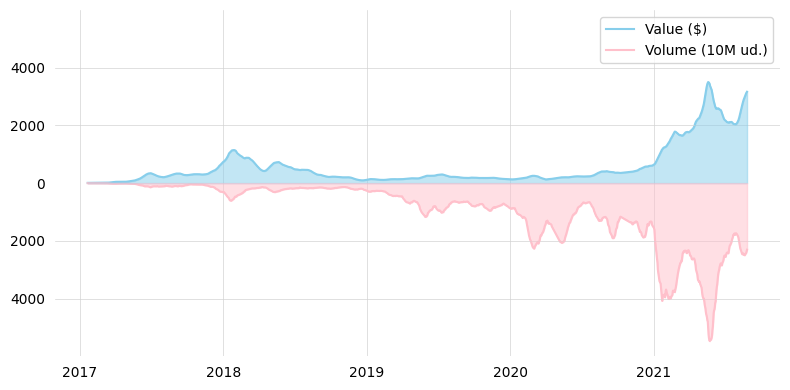

In [60]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400px

# Alias para facilitar el acceso
x = df_smooth.index
y_open = df_smooth['Open']
y_vol = df_smooth['Volume']

# Líneas de evolución
ax.plot(x, y_open, label='Value ($)', color='skyblue', linewidth=1.5)
ax.plot(x, -y_vol, label='Volume (10M ud.)', color='pink', linewidth=1.5)
# Relleno del área
plt.fill_between(x, y_open, alpha=0.5, color='skyblue', zorder=3)
plt.fill_between(x, -y_vol, alpha=0.5, color='pink', zorder=3)

# Formateo de los ejes
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
y_ticks = [-4000, -2000, 0, 2000, 4000]
y_tick_labels = ['4000', '2000', '0', '2000', '4000']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(-6000, 6000)

# Rejilla
ax.xaxis.grid(color='lightgray', linewidth=.5)
for y_tick in y_ticks:
    if y_tick != 0:
        ax.axhline(y_tick, color='lightgray', linewidth=.5)

ax.legend()
ax.spines[:].set_visible(False)

fig.tight_layout()

<h2 style="color: red;">Do it yourself</h2>

Partiendo del fichero [mwh-spain-2021-clean.csv](https://aprendepython.es/_downloads/79a5c76738f17d91e0bf796b46fc9123/mwh-spain-2021-clean.csv) que contiene información sobre el precio de la energía en España durante el año 2021, crea el siguiente diagrama de evolución que representa la variación del precio del MWh en función del tiempo:

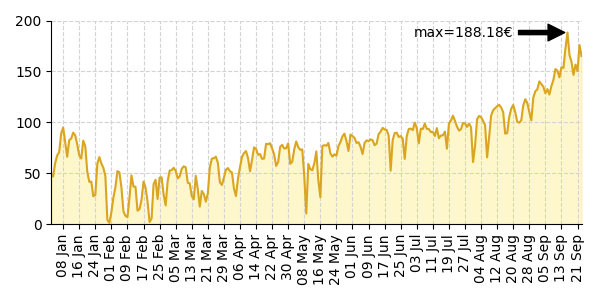

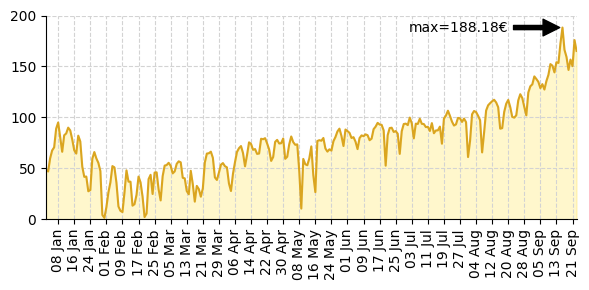

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter, DayLocator

df = pd.read_csv(
    'https://aprendepython.es/_downloads/79a5c76738f17d91e0bf796b46fc9123/mwh-spain-2021-clean.csv',
    parse_dates=['Fecha'],
    index_col='Fecha',
)

fig, ax = plt.subplots(figsize=(6, 3), dpi=100)

x = df.index
y = df.iloc[:, 0]

ax.plot(x, y, color='goldenrod')
plt.fill_between(x, y, alpha=0.2, color='gold')  # área

# Anotación del valor máximo
xmax, ymax = y.idxmax(), y.max()
ax.annotate(
    f'max={ymax}€',
    xy=(xmax, ymax),
    xytext=(-75, 0),
    textcoords='offset points',
    ha='center',
    va='center',
    arrowprops=dict(facecolor='black', shrink=0.05, width=3),
)

# Estilos para el eje x
ax.set_xlim(x.min(), x.max())
ax.xaxis.set_major_locator(DayLocator(interval=8))
ax.xaxis.set_major_formatter(DateFormatter('%d %b'))
ax.tick_params(axis='x', which='major', rotation=90)

# Estilos para el eje y
ax.set_ylim(0, 200)

# Rejilla
ax.grid(color='lightgray', linestyle='dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()


**Radar Plot** 
  
También conocidos como polar or star plot permiten mostrar datos en forma de un gráfico bidimensional de tres o más variables cuantitativas representadas en ejes que comienzan desde el mismo punto

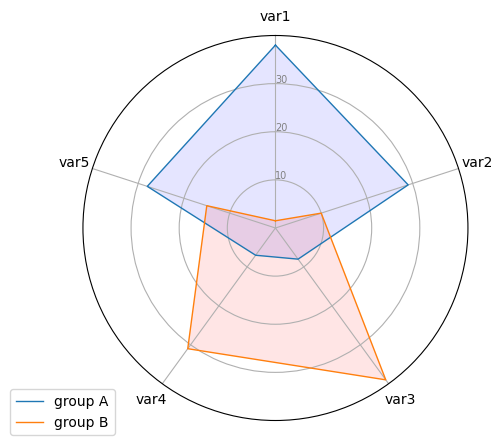

In [62]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()
